In [1]:
# 掌握 pandas 数据导入、清洗、重塑
# 进一步进行 数据可视化 matplotlib

# 信息可视化（也叫绘图） 是数据分析中最重要的工作之一
# 它可能是探索过程的一部分， 例如， 帮助我们找出异常值、 必要的数据转换、 得出有关模型的idea等。 
# 另外， 做一个可交互的数据可视化也许是工作的最终目标。 

# Python有许多库进行静态或动态的数据可视化， 
# 但这里重要关注于matplotlib（http://matplotlib.org/） 和基于它的库。

# matplotlib是一个用于创建出版质量图表的桌面绘图包（主要是2D方面）
# 该项目是由 John Hunter 于2002年启动的， 
# 其目的是为 Python 构建一个 MATLAB 式的绘图接口。 

# matplotlib 和 IPython 社区进行合作， 简化了从 IPython shell（包括现在的Jupyter notebook） 
#    进行交互式绘图。 matplotlib支持各种操作系统上许多不同的 GUI 后端， 
#    而且还能将图片导出为各种常见的矢量（vector） 和光栅（raster） 图： 
#    PDF、 SVG、 JPG、 PNG、 BMP、 GIF等

# 随着时间的发展， matplotlib 衍生出了多个数据可视化的工具集， 
#    它们使用 matplotlib 作为底层。 其中之一是 seaborn（http://seaborn.pydata.org/）


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# using matplotlin in notebook
%matplotlib notebook
# 将 matplotlib 绘制的图标嵌入 notebook
%matplotlib inline

In [6]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

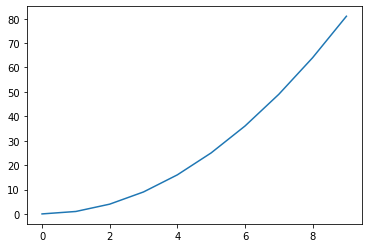

In [8]:
plt.plot(data ** 2)

In [9]:
# seaborn 库 和 pandas 内置绘图函数能过处理普通绘制图
# 自定义高级功能需要 matplotlib API
# matplotlib 官网的示例和文档就是学习的最佳资料
# 示例：https://matplotlib.org/gallery/index.html
# 教程：https://matplotlib.org/tutorials/index.html
# 文档：https://matplotlib.org/contents.html



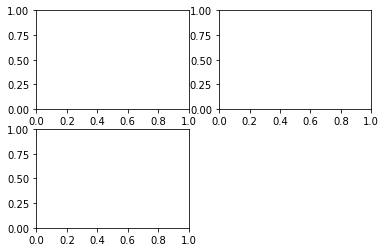

In [16]:
# Figure 和 Subplot

# matplotlib 的图形都位于 Figure 对象中
# 可以用 plt.figure 创建新的 Figure
fig = plt.figure()

# plt.figure有一些参数选项， 
#     特别是 figsize， 它用于确保当图片保存到磁盘时具有一定的大小和纵横比。
# 不能通过空的 Figure 绘图，必须用 add_subplot 创建一个或者多个 subplot 才可以绘图
ax1 = fig.add_subplot(2, 2, 1)
# 2 * 2 两行两列 四张图位置，编号从 1 开始
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

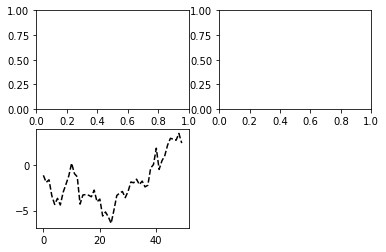

In [17]:
# notebook 中，每一个小窗口重新执行后，图形被重置
# 对于复杂图形，必须在将所有绘图命令存放在一个窗口 cell 中

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 如果这时执行一条绘图命令（plt.plot([1.5, 3.5, -2, 1.6])）， 
#   matplotlib 就会在最后一个用过的 subplot（如果没有则创建一个）上进行绘制， 
#   隐藏创建 figure 和 subplot 的过程
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [19]:
# 'k--' 是一个 线型 选项，绘制 黑色虚线 图
# fig.add_subplot 返回的对象是 AxesSubplot 对象
# 直接调用其实例方法可以在指定空位置绘图
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

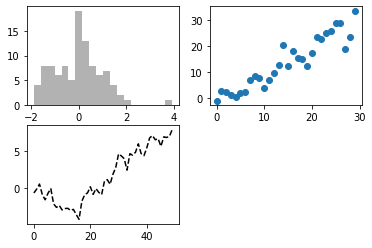

In [20]:
# 如以上可知，绘图显示不了，重点 在 notebook 中绘图必须在一个 cell 中才有效
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A561D48>,
      dtype=object)

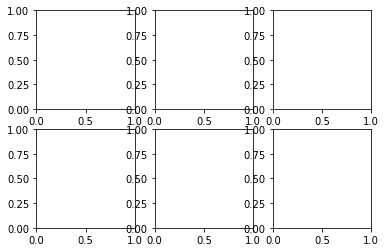

In [22]:
# 创建一个包含 subplot 网格式 的 figure 十分常见
# 等价于 == plt.subplots 
# 创建一个新的 Figure 对象，同时返回一个含有已创建的 subplot 对象的 numpy 数组

# fig 是一个 Figure 对象，axes 是一个 subplot 对象数组
fig, axes = plt.subplots(2, 3)
axes

In [25]:
print(type(fig))
type(axes)

<class 'matplotlib.figure.Figure'>


numpy.ndarray

In [26]:
# 查看函数参数情况，以及返回值 技巧
# 当光标停留在括号中时，先按住 Shift 键，然后 双击 Tab 键 即可

# 参数          说明
# nrows         subplot的行数
# ncols         subplot的列数
# sharex        所有subplot应该使用相同的X轴刻度(调节xlim将会影响所有subplot)
# sharey        所有subplot应该使用相同的Y轴刻度( 调节ylim将会影响所有subplot)
# subplot_ _kw  用于创建各subplot的关键字字典
# **fig_ _kw    创建figure时的其他关键字，如plt.subplots(2,2,figsize=(8,6))



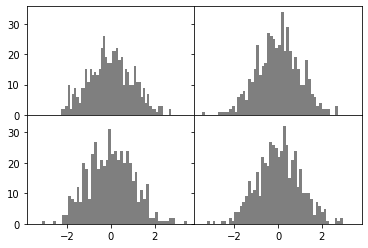

In [27]:
# 调整 subplot 周围的间距
# 默认情况下，matplotlib 会在 subplot 外围留下一定的间距，
#  并在 subplot 之间留下一定间距，该间距跟图像的高度和宽度有关
#  所有调整了图像的大小，间距也会自动的调整

# 利用 Figure 的 subplots_adjust 方法可以调整修改间距，也是一个顶级函数
# subplots_adjust(left=None, bottom=None, 
#                 right=None, top=None,
#                 wspace=None, hspace=None)

# wspace 控制宽度的百分比
# hspace 控制高度的百分比

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

In [28]:
# 结果显示可知，其中的标签轴重叠了，matplotlib 不会检查标签是否重叠
#  对于这种情况，只能自己设定 刻度位置、刻度标签


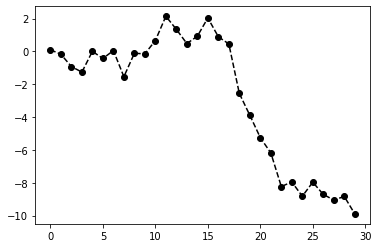

In [32]:
# 颜色、标记、线型

# matplotlib 的 plot 函数接受一组 X 和 Y 坐标， 
#  还可以接受一个表示 颜色 和 线型 的 字符串缩写
# 例如，要根据 x 和 y 绘制 绿色虚线， 执行如下代码：
# ax.plot(x, y, 'g--')

# 这种在一个 字符串 中指定 颜色 和 线型 的方式非常方便。 
# 在实际中， 如果用代码绘图， 可能不想通过处理 字符串 来获得想要的格式。 
# 通过下面这种更为明确的方式也能得到同样的效果：
# ax.plot(x, y, linestyle='--', color='g')

# 常用的颜色可以使用 颜色缩写， 也可以指定颜色码（例如， '#CECECE'）
# 可以通过查看 plot 的文档 字符串 查看所有 线型 的合集（在IPython和Jupyter中使用plot?）
#  plot 线图 可以使用 标记 强调 数据点
#   matplotlib 可以创建 连续线图， 在点之间进行 插值， 因此有时可能不太容易看出 真实数据点的位置
#   标记也可以放到 格式字符串 中， 但 标记类型和 线型必须放在 颜色后面
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

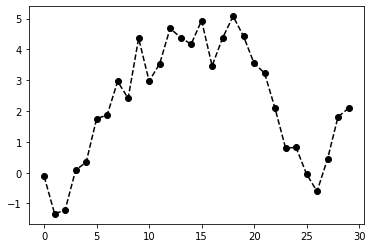

In [34]:
# 还可以将其写成更为明确的形式：
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

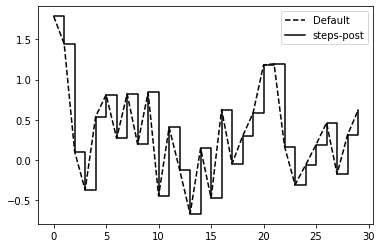

In [35]:
# 在线型图中， 非实际数据点 默认是按 线性方式插值 的。 
#        可以通过 drawstyle 选项修改：
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')
# 可能注意到运行上面代码时有输出。 
# matplotlib 会返回引用了 新添加的子组件的对象。 
# 大多数时候， 可以放心地忽略这些输出。 
# 这里， 因为传递了 label 参数到 plot，可以创建一个 plot 图例， 指明每条使用 plt.legend 的线。
# 笔记： 必须调用 plt.legend（或使用ax.legend， 如果引用了轴的话） 
#           来创建图例， 无论绘图时是否传递 label 标签选项。



In [36]:
# 刻度、 标签和图例

# 对于大多数的图表装饰项， 其主要实现方式有二： 
#      1、使用过程型的 pyplot 接口（例如，matplotlib.pyplot） 
#      2、更为面向对象的原生 matplotlib API

# pyplot 接口的设计目的就是交互式使用， 含有诸如 xlim、 xticks 和 xticklabels 之类的方法
#   它们分别 控制图表的范围、 刻度位置、 刻度标签等。 
# 其使用方式有以下两种：
#       调用时不带参数， 则返回当前的参数值（例如， plt.xlim()返回当前的X轴绘图范围） 。
#       调用时带参数， 则设置参数值（例如， plt.xlim([0,10])会将X轴的范围设置为0到10） 。

# 所有这些方法都是 对 当前 或 最近创建的 AxesSubplot 起作用的。 
# 它们各自对应 subplot 对象上的两个方法， 以 xlim 为例， 就是 ax.get_xlim和 ax.set_xlim
#   建议使用 subplot 的实例方法（因为明确的事情， 而且在处理多个 subplot 时这样也更清楚一些）


Text(0.5, 1.0, 'My first matplotlib plot')

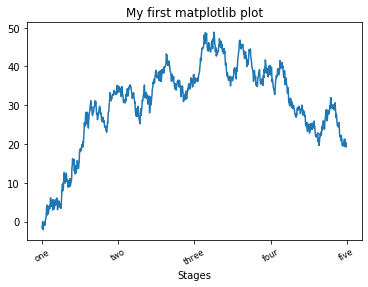

In [41]:
# 设置标题、轴标签、刻度、刻度标签

# 自定义轴的信息
# 创建并绘图一段随机漫步
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# 改变 x 轴的刻度，y 轴的刻度设置也一样
# 使用 set_xticks : 告诉 matplotlib 将刻度放在数据范围的哪些位置，默认情况下，这些位置也是刻度标签
# 使用 set_sticklabels ：将使用其他任意值作为标签
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                            rotation=30, fontsize='small')
# rotation 选项设置 x 刻度标签 倾斜角度

# set_xlabel : 设置 x 轴名称
ax.set_xlabel('Stages')
# set_title ： 设置 图像标题名称
ax.set_title("My first matplotlib plot")

In [42]:
# # 改变 x 轴的刻度，y 轴的刻度设置也一样
# # 使用 set_xticks : 告诉 matplotlib 将刻度放在数据范围的哪些位置，默认情况下，这些位置也是刻度标签
# # 使用 set_sticklabels ：将使用其他任意值作为标签
# y_ticks = ax.set_yticks([-30, -20, -10, 0, 10])
# y_labels = ax.set_yticklabels(['one', 'two', 'three', 'four', 'five'], 
#                               rotation=30, fontsize='small')
# # set_ylabel : 设置 y 轴名称
# ax.set_ylabel('Cumsum')

# Y 轴的修改方式与此类似， 只需将上述代码中的 x 替换为 y 即可。 

# 轴的类有集合方法， 可以批量设定 绘图选项。 前面的例子， 也可以写为：
# props = {'title': 'My first matplotlib plot',
#          'xlabel': 'Stages'} 
# ax.set(**props)

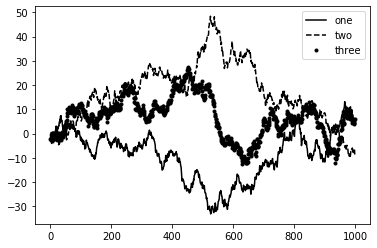

In [45]:
# 添加图例

# 图例 legend 是另一种用于 标识图表元素 的重要手段
# 添加图例方式多样，简单添加 subplot 的时候传入 label 参数，然后使用 ax.legend() 创建图例

from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 要从图例中去除一个或多个元素， 不传入 label 或传入 label='nolegend' 即可
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

# loc 图例位置
ax.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

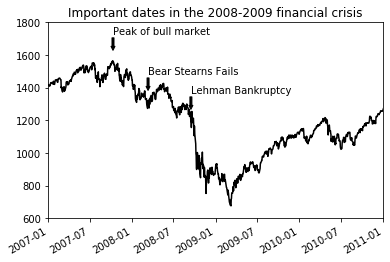

In [46]:
# 注解 以及 在 Subplot 上绘图

# 处理标准绘图类型外，希望绘制一些子集的注解，
# 注解 ：文本、箭头、或者其他图形
# 注解和文字 通过 text arrow annotate 函数进行添加

# text 可以将文本绘制在图表指定坐标（x， y），还可以自定义格式
# ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)

# 注解中可以同时存在 文本和箭头
# 根据最近的标准普尔500指数价格绘制一张曲线图， 并标出2008年到2009年金融危机期间的一些重要日期

from datetime import datetime

dataset_path = './../dataset/'

# 创建 subplot 绘图对象
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 加载数据
data = pd.read_csv(dataset_path + 'spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

# 绘制线图
spx.plot(ax=ax, style='k-')

# 设置 注解位置以及文本内容
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')] 

# 批量处理 注解
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, 
                                headlength=4), horizontalalignment='left', 
                                verticalalignment='top')

# Zoom in on 2007-2010
# 设定 刻度以及标签信息
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

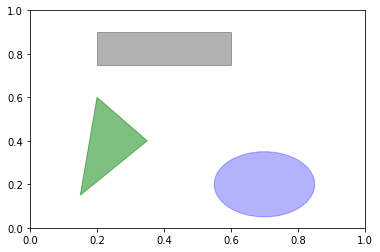

In [47]:
# 这张图中有几个重要的点要强调： 
#    ax.annotate 方法可以在指定的 x 和 y 坐标轴绘制标签。 
#    set_xlim 和 set_ylim 人工设定起始和结束边界，而不使用 matplotlib 的默认方法。 
#    用 ax.set_title 添加图标标题。

# 更多有关注解的示例， 请访问 matplotlib 的在线示例库

# 图形 （图像 和 图形 是两个概念，在计算机科学领域，不要混淆）的绘制要麻烦一些。 
# matplotlib 有一些表示常见图形的对象
# 这些对象被称为块（patch）。 其中有些（如 Rectangle 和 Circle）， 
# 可以在 matplotlib.pyplot 中找到，但完整集合位于 matplotlib.patches。

# 要在图表中添加一个图形， 需要创建一个块对象 shp， 
# 然后通过 ax.add_patch(shp) 将其添加到 subplot中
# 如果查看许多常见图表对象的具体实现代码，就会发现它们其实就是由块 patch 组装而成的

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [48]:
# 将图表 保存到文件

# 利用 plt.savefig 可以将当前图表保存到文件
# 该方法相当于 Figure 对象的实例方法 savefig

# 例如，要将图表保存为 SVG 文件，只需输入：
#     plt.savefig('figpath.svg')

# 文件类型 是通过 文件扩展名 推断出来的
# 使用的是 .pdf，就会得到一个 PDF文件

# 在发布 片时最常用到两个重要的选项是 dpi（控制“每英寸点数”分辨率） 
#                                bbox_inches（可以剪除当前图表周围的空白部分）
# 要得到一张带有 最小白边 且 分辨率为 400DPI的 PNG 图片：
#     plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

# savefig 并非一定要写入磁盘， 也可以写入任何 文件型的对象， 比如 BytesIO：
# from io import BytesIO
# buffer = BytesIO()
# plt.savefig(buffer)
# plot_data = buffer.getvalue()

# savefig 参数表
# 参数                 说明
# fname               含有文件路径的字符串或Python的文件型对象。
#                     图像格式由文件扩展名推断得出，例如 .pdf推断出PDF，.png推 断出PNG 
# dpi                 图像分辨率(每英寸点数)，默认为 100 
# cecolor. edgecolor  图像的背景色， 默认为“w”(白色)
# format              显式设置文件格式(“png”、“pdf” 、“svg” 、“ps'、"eps” ....
# bbox_ _inches       图表需要保存的部分。如果设置为“tight” ，则将尝试剪除图表周围的空白部分



In [49]:
# matplotlib 配置

# matplotlib 自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息
# 所有默认行为都能通过一组全局参数进行自定义，
#    管理图像大小、subplot边距、配色方案、字体大小、网格类型等

# 一种 Python 编程方式配置系统的方法是使用 rc 方法
# 例如，将全局图形默认大小设置为 10X10 
# 执行代码：plt.rc('figure', figsize=(10, 10))
# rc 的第一个参数是希望自定义的对象 如'figure'、 'axes'、 'xtick'、 'ytick'、 'grid'、 'legend'等。
#      其后可以跟上一系列的关键字参数。

# 一个简单的办法是将这些选项写成一个字典：
# font_options = {'family' : 'monospace', 
#                 'weight' : 'bold',
#                 'size' : 'small'}
# plt.rc('font', **font_options)

# 要了解全部的自定义选项， 请查阅 matplotlib 的配置文件 matplotlibrc
#  （位于 matplotlib/mpl-data目录中） 
# 如果对该文件进行了自定义，并将其放在自己的 .matplotlibrc目录中，则每次使用 matplotlib时会加载该文件

